# Import Library

In [2]:
# dataframe
import pandas as pd

# data prep
from sklearn.model_selection import train_test_split, GridSearchCV

# classification model
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

# iterator
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, recall_score, precision_score, f1_score, classification_report
from sklearn.pipeline import Pipeline

# Import CountVectorizer and TFIDFVectorizer from feature_extraction.text.
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# viz
import matplotlib.pyplot as plt
import seaborn as sns

# Import Data

In [3]:
reviews = pd.read_csv('../data/reviews_sentimental.csv')

In [4]:
reviews

,attraction,city,address,review,date,year,month,engineered_review,crowded
0,Fushimi Inari-taisha Shrine,Kyoto,"68 Fukakusa Yabunouchicho, Fushimi-ku, Kyoto 6...",We visited Fushimi Inari as part of a tour (hi...,2020-03-01,2020,3,visited fushimi inari part tour highly recomme...,1
1,Fushimi Inari-taisha Shrine,Kyoto,"68 Fukakusa Yabunouchicho, Fushimi-ku, Kyoto 6...","We loved this shrine, so amazing and a nice ea...",2020-05-01,2020,5,loved shrine amazing nice easy hike went early...,1
2,Fushimi Inari-taisha Shrine,Kyoto,"68 Fukakusa Yabunouchicho, Fushimi-ku, Kyoto 6...",A trip to Kyoto is incomplete without visiting...,2019-12-01,2019,12,trip kyoto incomplete without visiting fushimi...,0
3,Fushimi Inari-taisha Shrine,Kyoto,"68 Fukakusa Yabunouchicho, Fushimi-ku, Kyoto 6...",One of Kyoto’s oldest historic landmarks!!The ...,2021-03-01,2021,3,one kyoto oldest historic landmark important i...,1
4,Fushimi Inari-taisha Shrine,Kyoto,"68 Fukakusa Yabunouchicho, Fushimi-ku, Kyoto 6...",What you see in the pictures is just the very ...,2020-02-01,2020,2,see picture surface place spend hour recommend...,0
...,...,...,...,...,...,...,...,...,...
12670,Studio Escape,Osaka,"1-6-17 Shikitsunishi, Naniwa-ku, Osaka 556-001...","We stumbled upon this by accident, having take...",2018-04-01,2018,4,stumbled upon accident taken food tour run one...,0
12671,Studio Escape,Osaka,"1-6-17 Shikitsunishi, Naniwa-ku, Osaka 556-001...",This is my 70-something escape room and one of...,2019-10-01,2019,10,70 something escape room one favourite theme a...,0
12672,Studio Escape,Osaka,"1-6-17 Shikitsunishi, Naniwa-ku, Osaka 556-001...","A friend wanted to try this, so he organised f...",2019-08-01,2019,8,friend wanted try organised three u together d...,1
12673,Studio Escape,Osaka,"1-6-17 Shikitsunishi, Naniwa-ku, Osaka 556-001...",Nice escape room. Can highly recommend. The ow...,2019-07-01,2019,7,nice escape room highly recommend owner nice g...,0


In [5]:
X = reviews['engineered_review']

In [6]:
y = reviews['crowded']

In [7]:
y.value_counts()

0    11541
1     1134
Name: crowded, dtype: int64

In [8]:
y.value_counts(normalize =True)

0    0.910533
1    0.089467
Name: crowded, dtype: float64

> There is data imbalance between different classes. We may want to generate synthetic data points to address this imbalance in subsequent models if our baseline model does not perform well.

# Data Transformation

## Trial

In this section, we try adjusting hyperparameter (max_features, min_df, max_df) to ensure that the identified sentimental keywords (crowd, queue, wait) words are captured.

In [9]:
# initiate with these hyperparameters
cvec = CountVectorizer(max_features = 2000, min_df = 5, max_df = 0.9, ngram_range = (1,2))

In [10]:
X_wait = cvec.fit_transform(X)

In [11]:
X_wait_df = pd.DataFrame(X_wait.todense(), 
                          columns=cvec.get_feature_names_out())
X_wait_df

,00,000,000 yen,10,10 min,10 minute,100,1000,1000 yen,11,...,yen,yen per,yes,yet,young,yuca,yukata,yuki,yurico,zen
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12670,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12671,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12672,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12673,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
X_wait_word = pd.DataFrame(X_wait_df.sum().items(), columns=['word', 'count'])
X_wait_word

,word,count
0,00,80
1,000,152
2,000 yen,56
3,10,586
4,10 min,53
...,...,...
1995,yuca,58
1996,yukata,99
1997,yuki,61
1998,yurico,219


In [13]:
# sentiment keywords
keywords = ['crowd','queue','wait']

In [14]:
for word in X_wait_word['word']:
    for keyword in keywords:
        if keyword in word:
            print(word)

crowd
crowded
queue
wait
waiting


> Below hyperparametes can successfully identify the keywords
> * max_features = 2000
> * min_df = 5
> * max_df = 0.9
> * ngram_range = (1,2)

## Train-test split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    stratify=y,
                                                    random_state=99)

# Data Modeling

## Model #1: MultinomialNB, CountVectorizer

We initiate our baseline model using MultinomialNB. Since we have obtained desired CountVectorizer hyperparameter in above trial, to further optimized it, we use gridsearch and skew the parameters further.

In [15]:
pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('nb', MultinomialNB())
])

In [16]:
pipe_params = {
    'cvec__max_features': [1_000, 2_000, 3_000],
    'cvec__min_df': [5, 10],
    'cvec__max_df': [0.8, 0.9, 0.95],
    'cvec__ngram_range': [(1,1), (1,2), (1,3)]
}

In [17]:
gs = GridSearchCV(pipe,
                  param_grid=pipe_params,
                  cv=3,
                  n_jobs = -1)

In [18]:
gs.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('nb', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'cvec__max_df': [0.8, 0.9, 0.95],
                         'cvec__max_features': [1000, 2000, 3000],
                         'cvec__min_df': [5, 10],
                         'cvec__ngram_range': [(1, 1), (1, 2), (1, 3)]})

In [19]:
gs.best_score_

0.8781555613938772

In [20]:
gs.best_params_

{'cvec__max_df': 0.8,
 'cvec__max_features': 1000,
 'cvec__min_df': 5,
 'cvec__ngram_range': (1, 1)}

> seems that tightening the features criteria min_df (0.9 --> 0.8), max_features (2000--> 1000), ngram_range (1,2 --> 1.1) yield better result

In [21]:
gs.score(X_train, y_train)

0.8806357078449053

In [22]:
gs.score(X_test, y_test)

0.8643176439652905

> train and test are well fitted

In [23]:
# Get predictions
preds = gs.predict(X_test)
preds

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [24]:
conf_matrix = confusion_matrix(y_test, preds)
print(conf_matrix)

[[3029  434]
 [  82  258]]


In [25]:
# Save confusion matrix values
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()

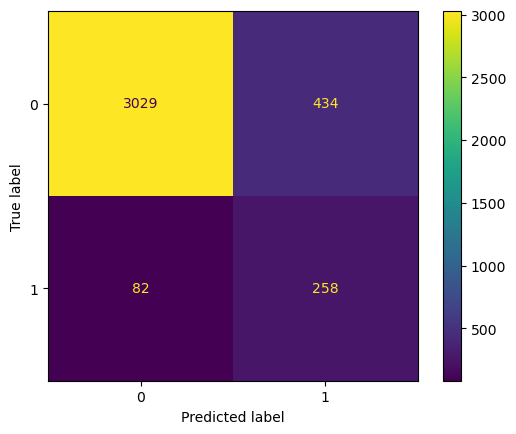

In [26]:
# View confusion matrix
cm = confusion_matrix(y_test, preds)
disp =ConfusionMatrixDisplay(confusion_matrix=cm, 
                             display_labels=gs.best_estimator_.classes_)
disp.plot()

In [27]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.97      0.87      0.92      3463
           1       0.37      0.76      0.50       340

    accuracy                           0.86      3803
   macro avg       0.67      0.82      0.71      3803
weighted avg       0.92      0.86      0.88      3803



> Despite relatively good recall score (0.76), precision is very low (0.37). This implies that our model is not good enough to predict the sentiment.

model | transformer | estimator | precision | recall | f1
---|---|---|---|---|---
model #1 (baseline) | cvec (max_fea = 1000, df_min= 5, df_max = 0.8, ngram = 1,1) | multiNB | 0.37 | 0.76 | 0.5


## Model #2: MultinomialNB, TF-IDF Vectorizer

In model 2, we will replace CountVectorizer with TF-IDF Vectorizer. While CountVectorizer captures the frequency of words used in positive or negative sentiment contexts, TF-IDF Vectorizer captures the significance of sentiment-specific words that might not occur as frequently but carry strong sentiment signals.

In [28]:
pipe = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('nb', MultinomialNB())
])

In [29]:
# passing same hyperparameters as cvec to compare head-to-head
pipe_params = {
    'tvec__max_features': [1_000, 2_000, 3_000],
    'tvec__min_df': [5, 10],
    'tvec__max_df': [0.8, 0.9, 0.95],
    'tvec__ngram_range': [(1,1), (1,2), (1,3)]
}

In [30]:
gs = GridSearchCV(pipe,
                  param_grid=pipe_params,
                  cv=3,
                  n_jobs = -1)

In [31]:
gs.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('tvec', TfidfVectorizer()),
                                       ('nb', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'tvec__max_df': [0.8, 0.9, 0.95],
                         'tvec__max_features': [1000, 2000, 3000],
                         'tvec__min_df': [5, 10],
                         'tvec__ngram_range': [(1, 1), (1, 2), (1, 3)]})

In [32]:
gs.best_score_

0.9170423657123145

In [33]:
gs.best_params_

{'tvec__max_df': 0.8,
 'tvec__max_features': 1000,
 'tvec__min_df': 10,
 'tvec__ngram_range': (1, 2)}

> best parameters looks similar to cvec except ngram_range of (1,2) is preferred.

In [34]:
gs.score(X_train, y_train)

0.9239179440937781

In [35]:
gs.score(X_test, y_test)

0.9221667104917171

> model fit is slightly better than cvec

In [36]:
# Get predictions
preds = gs.predict(X_test)
preds

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [37]:
conf_matrix = confusion_matrix(y_test, preds)
print(conf_matrix)

[[3463    0]
 [ 296   44]]


In [38]:
# Save confusion matrix values
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()

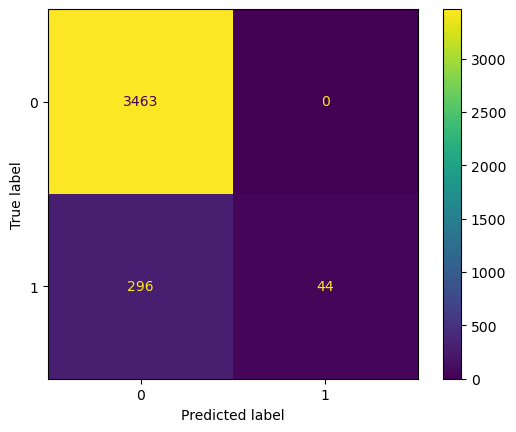

In [39]:
# View confusion matrix
cm = confusion_matrix(y_test, preds)
disp =ConfusionMatrixDisplay(confusion_matrix=cm, 
                             display_labels=gs.best_estimator_.classes_)
disp.plot()

In [40]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      3463
           1       1.00      0.13      0.23       340

    accuracy                           0.92      3803
   macro avg       0.96      0.56      0.59      3803
weighted avg       0.93      0.92      0.89      3803



> However, recall score is significantly worse with only 0.13. This model fails to predict 'crowded' reviews (TP). Suspect because the 'crowdedness' sentiment score (y_true) is defined based on limited words, while TFIDF Vectorizer analyzed the weight of each words based on their occurrence in the corpus. The harmonization between those two may not be sufficient.

model | transformer | estimator | precision | recall | f1
---|---|---|---|---|---
model #1 (baseline) | cvec (max_fea = 1000, df_min= 5, df_max = 0.8, ngram = 1,1) | multiNB | 0.37 | 0.76 | 0.5
model #2 | tvec (max_fea = 1000, df_min= 5, df_max = 0.8, ngram = 1,2) | multiNB | 1 | 0.13| 0.23

## Model #3: Random Forest, CountVectorizer v2

In third model, we will go back to CountVectorizer, and change our estimator to random forest. 

In [16]:
pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('rf', RandomForestClassifier())
])

In [17]:
pipe_params = {
    'cvec__max_features': [1_000],
    'cvec__min_df': [10],
    'cvec__max_df': [0.8],
    'rf__n_estimators': [20,50,100],
    'rf__max_depth': [50,80],
    'rf__class_weight': [{0: 1, 1: 2}]
}

In [18]:
gs = GridSearchCV(pipe,
                  param_grid=pipe_params,
                  cv=3,
                  n_jobs = -1)

In [19]:
gs.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('rf', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'cvec__max_df': [0.8], 'cvec__max_features': [1000],
                         'cvec__min_df': [10],
                         'rf__class_weight': [{0: 1, 1: 2}],
                         'rf__max_depth': [50, 80],
                         'rf__n_estimators': [20, 50, 100]})

In [20]:
gs.best_score_

0.98737584896704

In [21]:
gs.best_params_

{'cvec__max_df': 0.8,
 'cvec__max_features': 1000,
 'cvec__min_df': 10,
 'rf__class_weight': {0: 1, 1: 2},
 'rf__max_depth': 50,
 'rf__n_estimators': 100}

> higher n_estimators and lower max_depth is more desirable

In [22]:
gs.score(X_train, y_train)

0.9989855725879171

In [23]:
gs.score(X_test, y_test)

0.9860636339731791

> model is well fitted

In [24]:
# Get predictions
preds = gs.predict(X_test)
preds

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [25]:
conf_matrix = confusion_matrix(y_test, preds)
print(conf_matrix)

[[3463    0]
 [  53  287]]


In [26]:
# Save confusion matrix values
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()

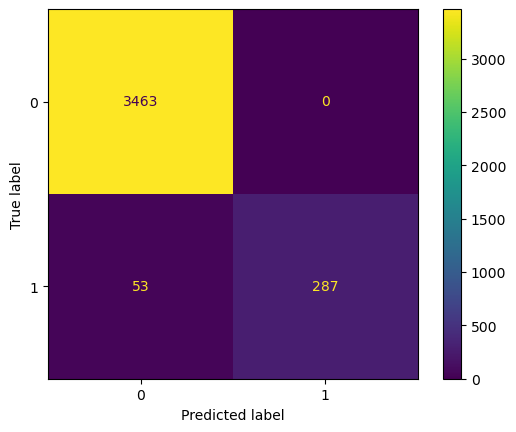

In [31]:
# View confusion matrix
cm = confusion_matrix(y_test, preds)
disp =ConfusionMatrixDisplay(confusion_matrix=cm, 
                             display_labels=gs.best_estimator_.classes_)

disp.plot()
plt.savefig('../image/cm_rf_cvec.png')

In [28]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3463
           1       1.00      0.84      0.92       340

    accuracy                           0.99      3803
   macro avg       0.99      0.92      0.95      3803
weighted avg       0.99      0.99      0.99      3803



> Random forest has significantly better recall score of 0.86. Since we have a severe data imbalance in our sentiment classes, random forest may address that by assigning weights to the minority class.

model | transformer | estimator | precision | recall | f1
---|---|---|---|---|---
model #1 (baseline) | cvec (max_fea = 1000, df_min= 5, df_max = 0.8, ngram = 1,1) | multiNB | 0.37 | 0.76 | 0.5
model #2 | tvec (max_fea = 1000, df_min= 5, df_max = 0.8, ngram = 1,2) | multiNB | 1 | 0.13| 0.23
model #3 | cvec (max_fea = 1000, df_min= 5, df_max = 0.8, ngram = 1,1) | random forest (n_est = 100, max_depth = 50) | 1 | 0.88 | 0.92

# Conclusion and Recommendation

**Conclusion:**
* Tripadvisor is a good platform to extract sufficient data and timeframe for this sentiment analysis on crowdedness.
* Despite using limited keywords (3), the sentiment score is able to generate consistent trend as seen in EDA section of this study.
* TFIDF Vectorizer does not perform well in this study, suspect because insufficient keywords are defined across the corpus. This may cause the vectorizer to put emphasis on other words. 
* Because of the nature of imbalance classes, random forest yields better accuracy. This is achieved throught adjusted class weights on the minority class.

**Using both sentiment score and optimized model, our stakeholder is able to strategize campaigns to ensure that local/foreign tourists have the best travel experience in the country.**
   
**Recommendation/Future Enhancement:**
* Feature Sentiment Analysis could be further enhanced, currently only rely on limited number of keywords.
* When more keywords are identified, TFIDF vectorizer would complement better in terms of adjusted weightage.
* To further address class imbalance, popular technique such as SMOTE (Synthetic Minority Over-sampling Technique) may help by generating synthetic data points for the minority class.

# References

* StraitsTimes: [Japan lifting border controls](https://www.straitstimes.com/asia/east-asia/japan-lifts-all-covid-19-border-controls-for-golden-week-holidays)
* Cartography Vector: [Japan GeoJSON](https://cartographyvectors.com/map/361-japan)
* World Atlas : [Japan Map](https://www.worldatlas.com/r/w960-q80/upload/4a/5a/54/jp-01.jpg)